In [20]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import talib

import sys
sys.path.append('../src')
#from data_loader import load_stock_data
from technical_indicators import calculate_indicators, visualize_indicators

# Configure plotting
sns.set(style="darkgrid")

In [9]:
# Load news data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')  # Adjust path if needed
news_df['date'] = pd.to_datetime(news_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Load stock price data (example: AAPL)
aapl_df = pd.read_csv('../data/AAPL_historical_data.csv')  # Your own company CSV
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])

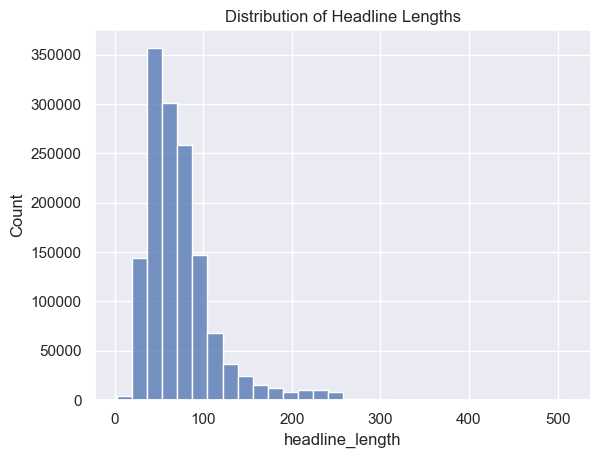

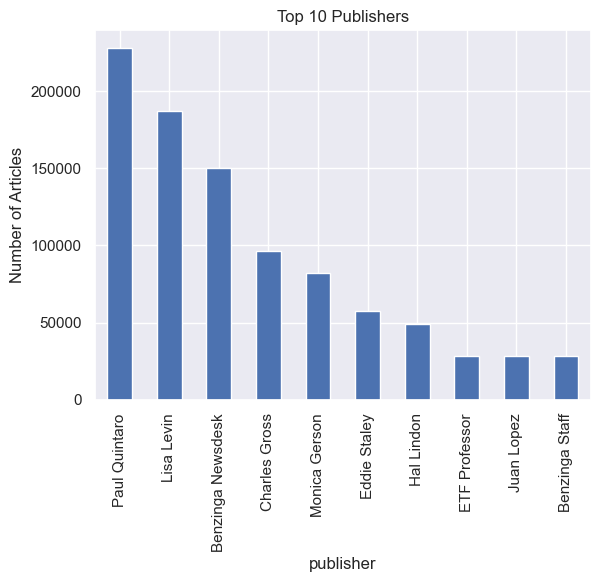

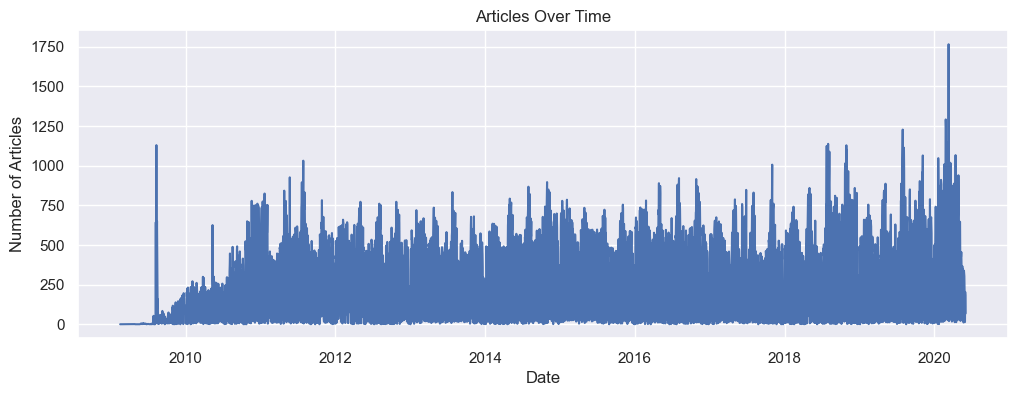

In [10]:
# Headline length
news_df['headline_length'] = news_df['headline'].apply(len)
sns.histplot(news_df['headline_length'], bins=30)
plt.title("Distribution of Headline Lengths")
plt.show()

# Articles per publisher
publisher_counts = news_df['publisher'].value_counts().head(10)
publisher_counts.plot(kind='bar')
plt.title("Top 10 Publishers")
plt.ylabel("Number of Articles")
plt.show()

# Articles over time
news_df['date_only'] = news_df['date'].dt.date
articles_per_day = news_df.groupby('date_only').size()
articles_per_day.plot(figsize=(12, 4))
plt.title("Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


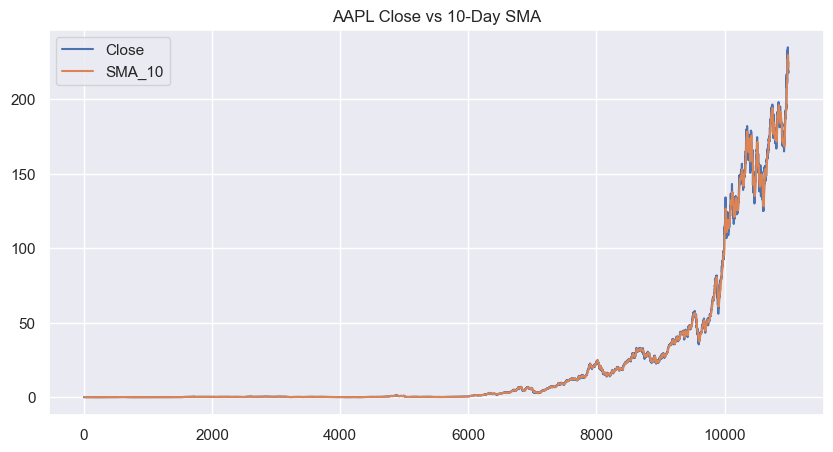

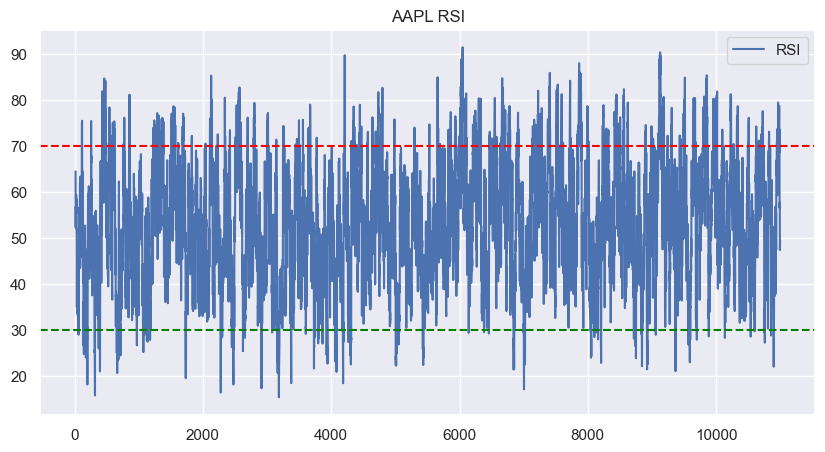

In [11]:
# Calculate indicators
aapl_df['SMA_10'] = talib.SMA(aapl_df['Close'], timeperiod=10)
aapl_df['RSI'] = talib.RSI(aapl_df['Close'], timeperiod=14)
aapl_df['MACD'], macdsignal, macdhist = talib.MACD(aapl_df['Close'])

# Visualize
aapl_df[['Close', 'SMA_10']].plot(figsize=(10,5))
plt.title("AAPL Close vs 10-Day SMA")
plt.show()

aapl_df[['RSI']].plot(figsize=(10,5))
plt.title("AAPL RSI")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()
